Import Libraries and Dataset

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Preprocessing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Create the Model

In [5]:
from keras.optimizers import Adam

# Hyperparameters
batch_size = 128
epochs = 10
num_classes = 10
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Train the Model

In [6]:
hist = model.fit(x_train,y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))

print("The model has successfully trained")
model.save('mnist_improved.h5')
print("Saving the model as mnist_improved.h5")

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 0.2778 - accuracy: 0.9076 - val_loss: 0.0452 - val_accuracy: 0.9861
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0254 - val_accuracy: 0.9915
Epoch 3/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0482 - accuracy: 0.9859 - val_loss: 0.0228 - val_accuracy: 0.9920
Epoch 4/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0245 - val_accuracy: 0.9923
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0192 - val_accuracy: 0.9943
Epoch 6/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.0218 - val_accuracy: 0.9932
Epoch 7/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.0236 - val_accuracy:

Evaluate the Model

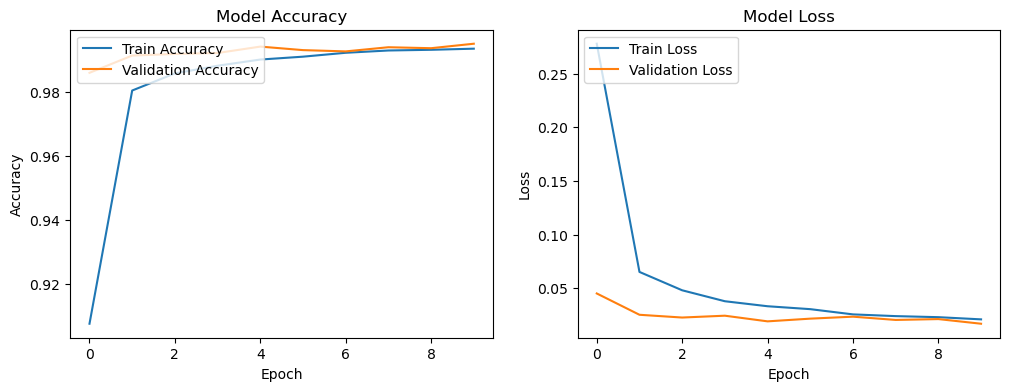

In [7]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [8]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.017033012583851814
Test accuracy: 0.995199978351593


1/1 [==============================] - 0s 122ms/step
The model predicts that the digit is: 4


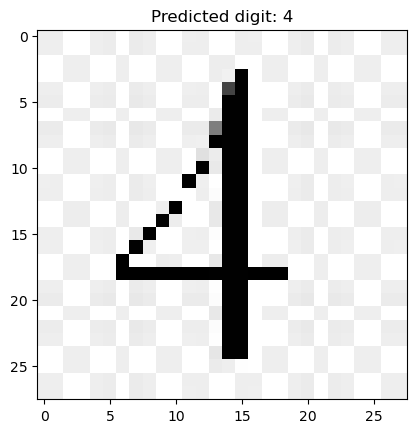

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Path to the image
img_path = '/Users/kritsadakruapat/Desktop/Collage/CSX4208DL/week2/digitAppLoadModel/4.jpeg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255
img_array = np.expand_dims(img_array, axis=0)

# Load the trained model
model = load_model('/Users/kritsadakruapat/Desktop/Collage/CSX4208DL/week2/digitAppLoadModel/mnist_improved.h5')

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f'The model predicts that the digit is: {predicted_class[0]}')

# Display the image
plt.imshow(img, cmap='gray')
plt.title(f'Predicted digit: {predicted_class[0]}')
plt.show()